In [1]:
import pandas as pd

In [2]:
url_filmes = "https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv"
filmes = pd.read_csv(url_filmes)

filmes.columns = ["filme_id", "titulo", "generos"]

filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
generos = filmes.generos.str.get_dummies()
generos.shape
# generos

(9742, 20)

In [6]:
dados_dos_filmes = pd.concat([filmes, generos], axis=1)

In [7]:
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn.preprocessing import StandardScaler
import numpy as np

np.random.seed(5)

scaler = StandardScaler()

generos_escalados = scaler.fit_transform(generos)
generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [7]:
from sklearn.cluster import KMeans

In [8]:
model = KMeans(n_clusters=3)
model.fit(generos_escalados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
model.labels_

array([0, 0, 1, ..., 1, 0, 1], dtype=int32)

In [10]:
import seaborn as sns
generos.columns

grupos = pd.DataFrame(model.cluster_centers_, columns=generos.columns)

In [11]:
# grupos.T.plot.bar(subplots=True, figsize=(25,25), sharex=False)
grupos.T

,0,1,2
(no genres listed),-0.059180,0.035832,-0.059180
Action,0.128784,-0.294460,0.638537
Adventure,1.109320,-0.240731,0.094618
Animation,1.940789,-0.252562,-0.231471
Children,2.116845,-0.269143,-0.267372
Comedy,0.159298,0.205692,-0.552150
Crime,-0.321911,-0.190532,0.585674
Documentary,-0.199931,0.127716,-0.215621
Drama,-0.597764,0.156981,-0.115179
Fantasy,1.204119,-0.165394,-0.123130


In [12]:
grupo = 0
filtro = model.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
7608,86880,Pirates of the Caribbean: On Stranger Tides (2...,Action|Adventure|Fantasy|IMAX,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7887,94833,"Pirates! Band of Misfits, The (2012)",Adventure|Animation|Children|Comedy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
72,80,"White Balloon, The (Badkonake sefid) (1995)",Children|Drama,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8535,115111,Ward 13 (2003),Action|Animation|Comedy|Horror,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3984,5618,Spirited Away (Sen to Chihiro no kamikakushi) ...,Adventure|Animation|Fantasy,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9667,182639,The Second Renaissance Part II (2003),Animation|Sci-Fi,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
464,531,"Secret Garden, The (1993)",Children|Drama,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9693,184641,Fullmetal Alchemist 2018 (2017),Action|Adventure|Fantasy,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6777,60141,St. Trinian's (2007),Children|Comedy,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6405,50872,Ratatouille (2007),Animation|Children|Drama,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f33422769e8>,
      dtype=object)

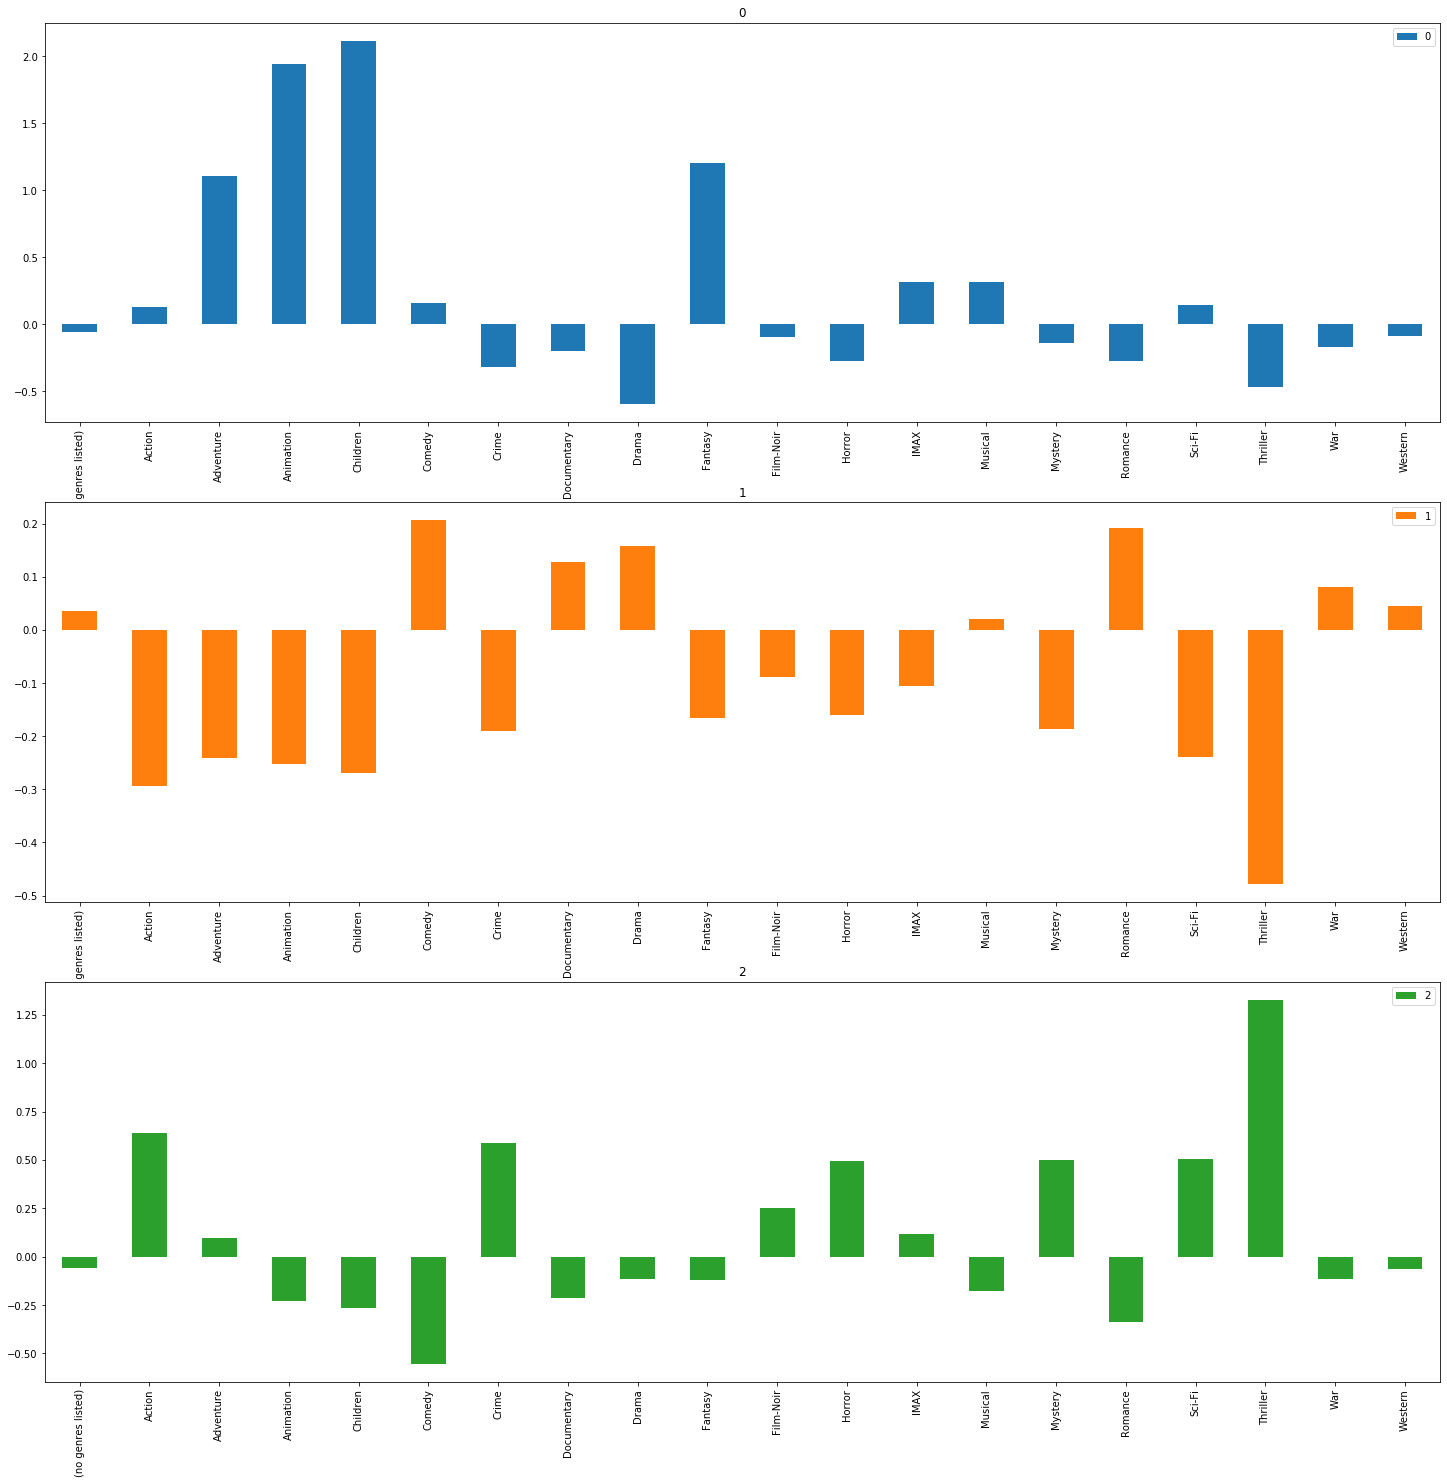

In [13]:
grupos.T.plot.bar(subplots=True, figsize=(25,25), sharex=False)

In [14]:
from sklearn.manifold import TSNE

In [15]:
TSNE

sklearn.manifold._t_sne.TSNE

In [16]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[-33.3273    , -53.75806   ],
       [-50.213104  , -31.95621   ],
       [ 33.8301    , -27.977095  ],
       ...,
       [ 15.397505  ,  -8.440565  ],
       [-34.7216    , -23.887127  ],
       [-20.349726  ,  -0.34948173]], dtype=float32)

In [17]:
import seaborn as sns
sns.set(rc={'figure.figsize':(13,13)})

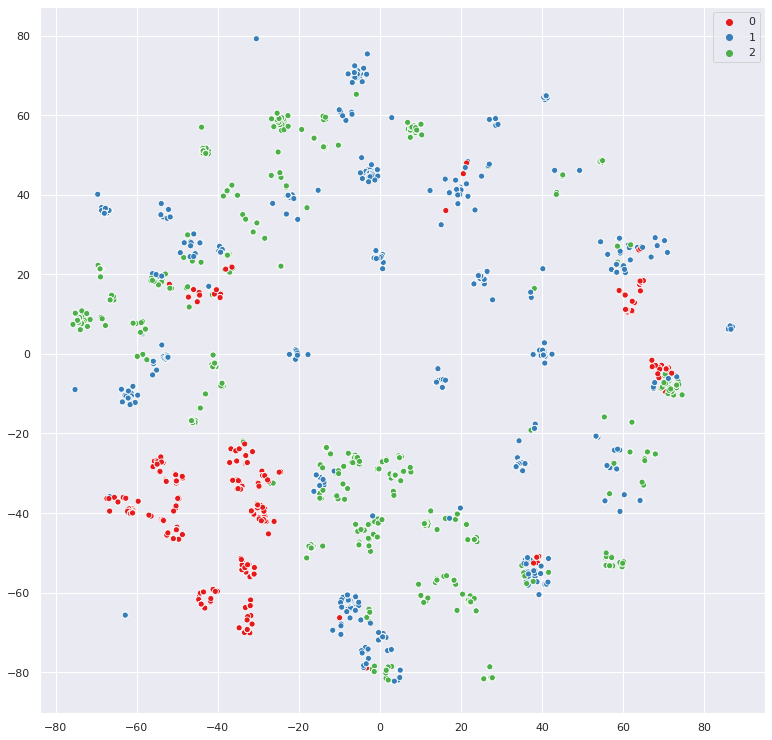

In [18]:
sns.scatterplot(x=visualizacao[:,0], y=visualizacao[:,1], hue=model.labels_, palette=sns.color_palette('Set1',3))

In [19]:
modelo = KMeans(n_clusters=20)

In [20]:
modelo.fit(generos_escalados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f33411af320>,
      dtype=object)

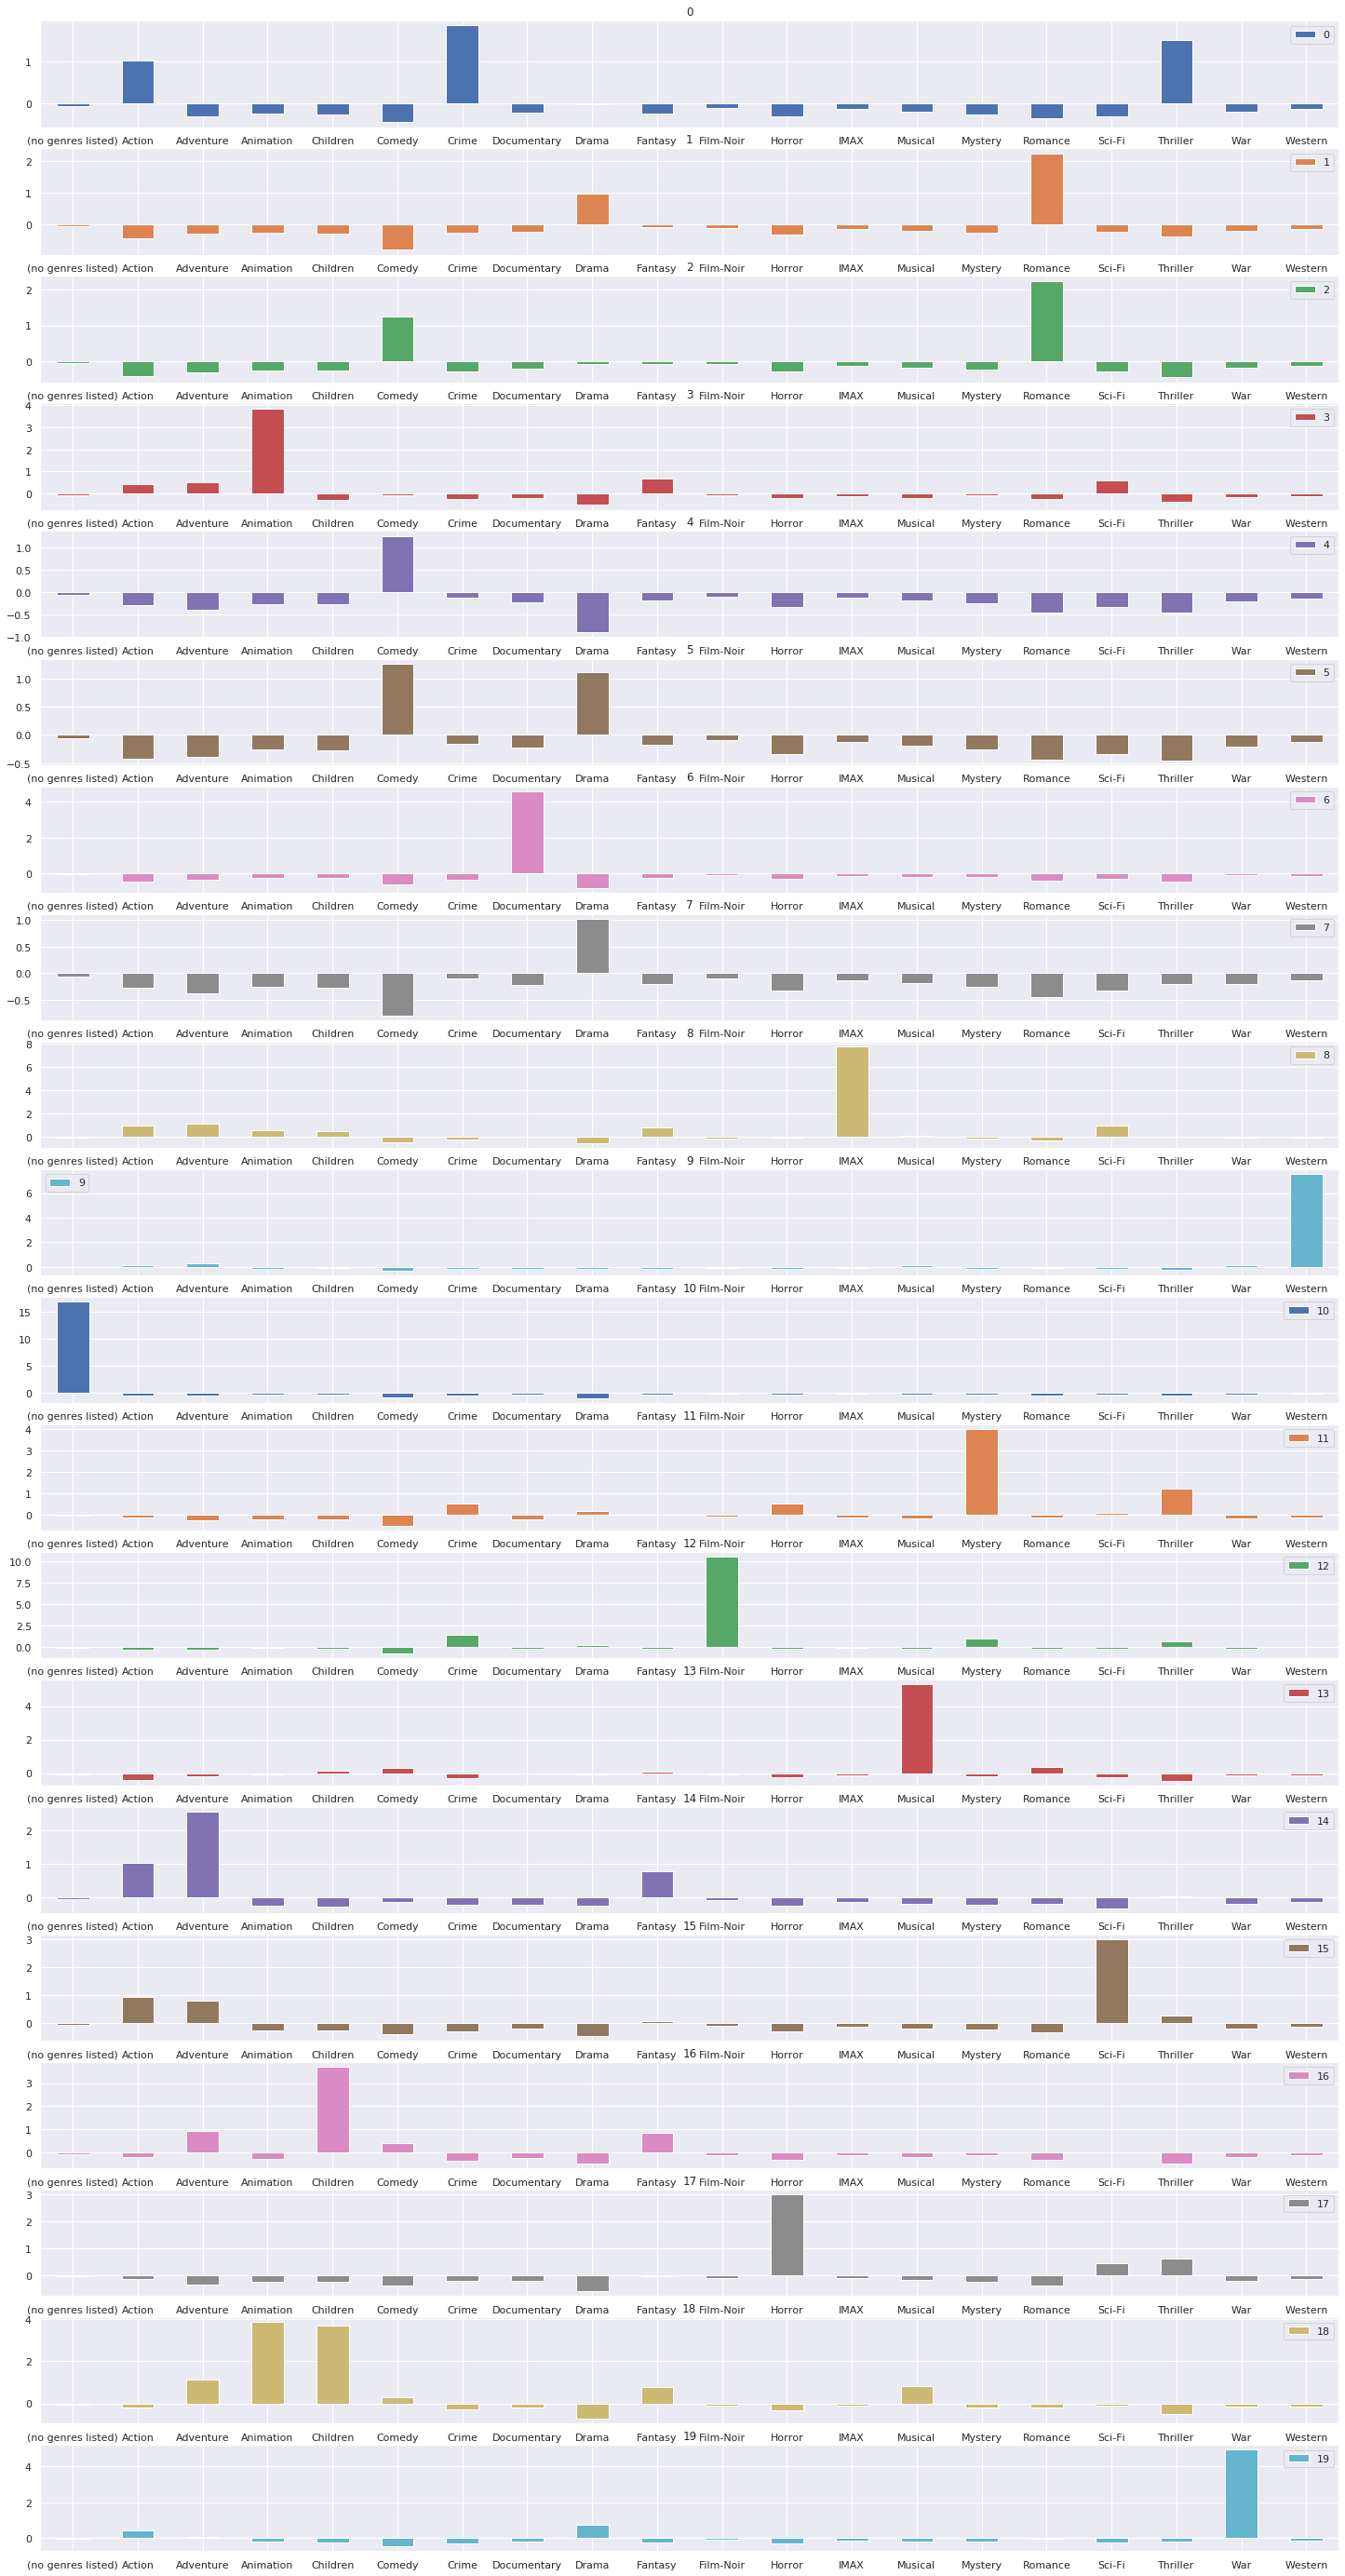

In [22]:
grupos.T.plot.bar(subplots=True, figsize=(25,50), sharex=False, rot=0)

In [23]:
def kmeans(numero_de_clusters, generos):
    modelo = KMeans(numero_de_clusters)
    modelo.fit(generos)
    return [numero_de_clusters, modelo.inertia_]

In [24]:
kmeans(20,generos_escalados)

[20, 55979.05122678704]

In [25]:
resultado = [kmeans(numero_de_grupos,generos_escalados) for numero_de_grupos in range(1,41)]
resultado

[[1, 194840.0],
 [2, 179483.94029403635],
 [3, 167921.10388921847],
 [4, 156745.55571542867],
 [5, 146597.9957498436],
 [6, 138302.6483686339],
 [7, 127964.75589630821],
 [8, 120141.92355643724],
 [9, 110497.84140313217],
 [10, 101712.75814408305],
 [11, 93809.96327229455],
 [12, 86940.08284578448],
 [13, 79672.99613932511],
 [14, 74745.02873365302],
 [15, 71073.69749452404],
 [16, 63157.96718396717],
 [17, 65578.31973461395],
 [18, 59388.39122811723],
 [19, 55429.44500476057],
 [20, 55757.99991974401],
 [21, 53444.98494239774],
 [22, 52047.16122342154],
 [23, 51073.19027522342],
 [24, 49640.85437967523],
 [25, 47814.05333572906],
 [26, 47709.82242783017],
 [27, 45841.65093292481],
 [28, 45057.03304131164],
 [29, 44072.841608209754],
 [30, 43426.11690632588],
 [31, 41645.68332712642],
 [32, 40668.98815558458],
 [33, 40323.514534575996],
 [34, 39186.739867685006],
 [35, 38205.68788603833],
 [36, 38089.709984364024],
 [37, 37082.15259598063],
 [38, 36705.82108738781],
 [39, 36788.8227084

In [26]:
resultado = pd.DataFrame(resultado, columns=['nClusters','inertia'])

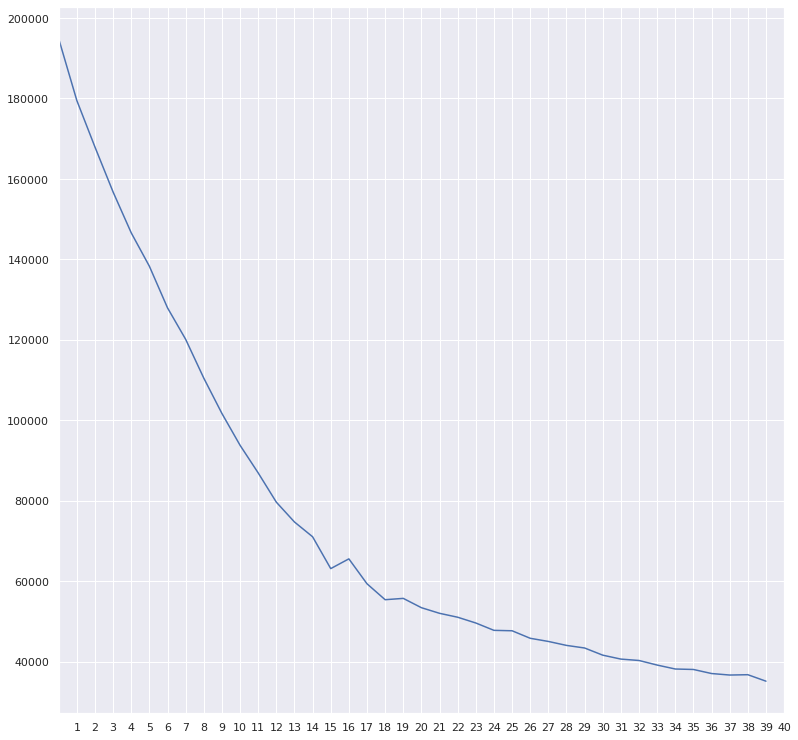

In [27]:
resultado.inertia.plot(xticks=resultado.nClusters)

In [28]:
from sklearn.cluster import AgglomerativeClustering

In [29]:
modelo = AgglomerativeClustering(n_clusters = 17)
modelo.fit_predict(generos_escalados)

array([ 5, 14, 13, ...,  2,  5,  3])

In [30]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 54.52914  ,  32.713    ],
       [ 62.93293  , -22.094925 ],
       [-27.316755 ,  -9.487448 ],
       ...,
       [ -8.626367 ,  13.674271 ],
       [ 52.32066  ,  -5.6274137],
       [ 30.509905 ,   4.50695  ]], dtype=float32)

In [31]:
sns.scatterplot(x=visualizacao[:,0], y=visualizacao[:,1], hue=grupos)

ValueError: could not broadcast input array from shape (9742) into shape (20)